In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
X_train = pd.read_csv('/home/lily/Downloads/stanford-cs229-master/me/data/logistic_x.txt', header = None, sep = '\s+')
y_train = pd.read_csv('/home/lily/Downloads/stanford-cs229-master/me/data/logistic_y.txt', header = None)

### plot of the data

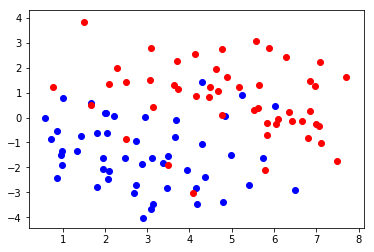

In [27]:
plt.scatter(x = X_train[y_train[0] == -1.][0],  y =  X_train[y_train[0] == -1.][1], c = ['blue'], marker = 'o')
plt.scatter(x = X_train[y_train[0] == 1.][0],  y =  X_train[y_train[0] == 1.][1], c = ['red'], marker = 'o')

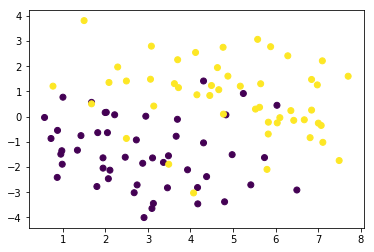

In [33]:
plt.scatter(x = X_train[0],  y =  X_train[1], c = y_train.values.squeeze(), marker = 'o')

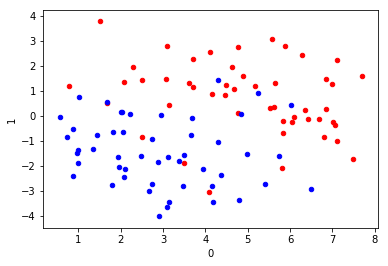

In [36]:
X_train['labels'] = y_train
ax = plt.axes()

X_train.query('labels == 1.0').plot.scatter(x = 0, y = 1, ax = ax, color = 'red')
X_train.query('labels == -1.0').plot.scatter(x= 0, y = 1, ax = ax, color = 'blue')

In [43]:
X_train.drop(columns ='labels', inplace = True)

In [64]:
X = X_train.values

In [65]:
y = y_train.values.squeeze()

In [66]:
X = np.hstack((np.ones((X.shape[0],1)),X))

In [93]:
theta = np.zeros(X.shape[1])
all_thetas = []
all_thetas.append(theta)

tol = 1e9
n_iters = 0
while tol > 1e-6:
    z = y * X.dot(theta)
    gz = 1 / (1 + np.exp(-z))
    #gz = gz.reshape(-1,1)
    theta_nabla = np.mean((gz-1) * y * X.T, axis = 1)
    theta_hessian = (gz * ( 1 - gz) * X.T).dot(X) / X.shape[0]
    #print(gz） 
    delta = np.linalg.inv(theta_hessian).dot(theta_nabla) # 牛顿法可能会出现奇异矩阵的情况
    old_theta = theta.copy()
    theta -= delta
    all_thetas.append(theta)
    n_iters += 1
    tol = np.sum(np.abs(old_theta - theta))
print('converged after {0} iterations'.format(n_iters))    

converged after 7 iterations


In [92]:
Xs = X.copy()
ys = y.copy()
all_thetas = [] # collect for demonstration purpose
theta = np.zeros(Xs.shape[1])
tol = 1e9
n_iters = 0-

while tol > 1e-6:
    zs = ys * Xs.dot(theta)
    gzs = 1 / (1 + np.exp(-zs))
    nabla = np.mean((gzs - 1) * ys * Xs.T, axis=1)
    
    # Refactor, more efficient way of calculating hessian
    hessian = np.zeros((Xs.shape[1], Xs.shape[1]))
    for i in range(hessian.shape[0]):
        for j in range(hessian.shape[0]):
            if i <= j:
                hessian[i][j] = np.mean(gzs * (1 - gzs) * Xs[:,i] * Xs[:,j])
                if i != j:
                    hessian[j][i] = hessian[i][j]
    #print(gzs)
    #print(nabla)
    #print(hessian)
            
    delta = np.linalg.inv(hessian).dot(nabla)
    old_theta = theta.copy()
    theta -= delta
    all_thetas.append(theta.copy())
    n_iters += 1
    tol = np.sum(np.abs(theta - old_theta))
print('converged after {0} iterations'.format(n_iters))

converged after 7 iterations


### plot the data

In [97]:
# 画分界线
_x = np.array([np.min(X[:,1]), np.max(X[:,1])])

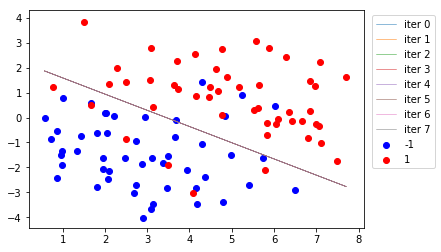

In [103]:
plt.scatter(x = X_train[y_train[0] == -1.][0],  y =  X_train[y_train[0] == -1.][1], c = ['blue'], marker = 'o',label='-1')
plt.scatter(x = X_train[y_train[0] == 1.][0],  y =  X_train[y_train[0] == 1.][1], c = ['red'], marker = 'o',label='1')

for i,theta in enumerate(all_thetas):
    _y = - (theta[1] * _x + theta[0]) / theta[2]
    plt.plot(_x, _y, label='iter %d'%(i),lw = 0.5)
plt.legend(bbox_to_anchor=(1.01,1),loc="upper left")

由上图可以看出，这7次迭代波动的范围很小，由此可以看出牛顿法对于这个数据集收敛速度比较快